CNN Catagorical Mini Project

In [1]:
import pandas as pd
import livelossplot
import keras
from keras import Sequential
import matplotlib.pyplot as plt

from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.layers import Dense
from keras.layers import Dropout

from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [3]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [6]:
# Add layersfrom keras.models import Sequential
model = Sequential()

### Convolutional Layers ###
# Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))

#Second 2D convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))

# Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer
model.add(Dropout(rate=0.25))

# Next two 2d Convolutional layers with 64 units 3x3 and relu
model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Another 2d Map pooling 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# another Dropout layer
model.add(Dropout(rate=0.25))

#add flattening layer
model.add(Flatten())

### 'ANN Layers' ###
#add a fully connected layer with 512 units relu
model.add(Dense(units=512, activation='relu'))

#another dropout layer with 0.5 rate
model.add(Dropout(rate=0.5))

#add softmax activation on dense layer for output
model.add(Dense(units=100, activation='softmax'))

In [7]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

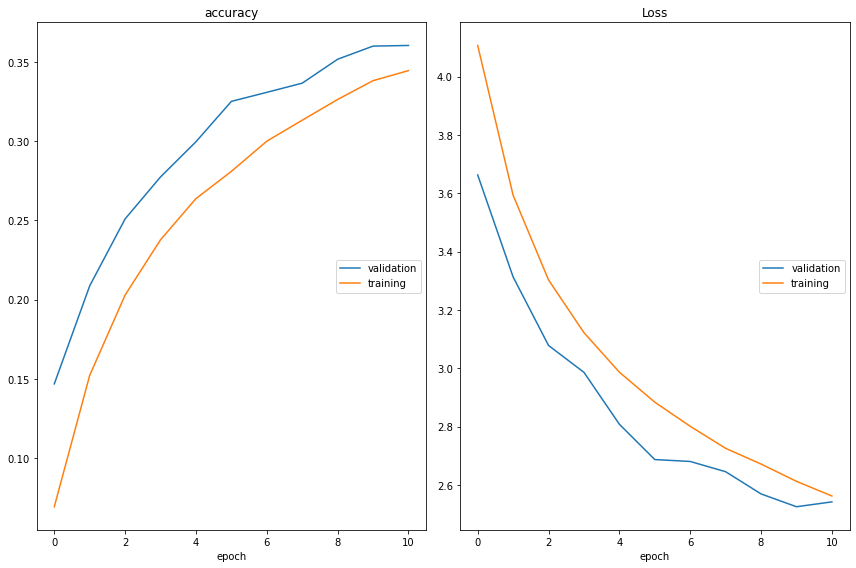

accuracy
	validation       	 (min:    0.147, max:    0.361, cur:    0.361)
	training         	 (min:    0.069, max:    0.345, cur:    0.345)
Loss
	validation       	 (min:    2.526, max:    3.663, cur:    2.542)
	training         	 (min:    2.562, max:    4.107, cur:    2.562)
Epoch 12/100
15968/50000 [========>.....................] - ETA: 46s - loss: 2.5003 - accuracy: 0.3560

In [8]:
#use livelossplot to show the curve
from livelossplot import PlotLossesKeras

model.fit(x_train, y_train,
          epochs=100,
          batch_size = 32,
          validation_data=(x_test, y_test),
          callbacks=[PlotLossesKeras()],
          verbose=1)

In [ ]:
#pull the loss and accuracy from the model
loss, accuracy = model.evaluate(x_test,y_test)

In [ ]:
loss

In [ ]:
accuracy